In [789]:
#dependencies
import requests
import pandas as pd 
from config import fred_key, nasdaq_key #, bls_key
import json
# import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from decimal import *
# import folium   
# from folium import plugins
import scipy.stats as st
# import traceback
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = nasdaq_key
import os
import warnings
from functools import reduce
warnings.filterwarnings('ignore')
# API keys obtained from  https://fred.stlouisfed.org/docs/api/fred/ and https://www.bls.gov/developers/home.htm and https://data.nasdaq.com/sign-up 
# using nasdaqdatalink lib is a bit easier, documentation is here https://pypi.org/project/Nasdaq-Data-Link/

,Date,30_Year_Fixed_Rate_Mortgage_Average
0,2010-01,5.03
1,2010-02,4.99
2,2010-03,4.97
3,2010-04,5.10
4,2010-05,4.89


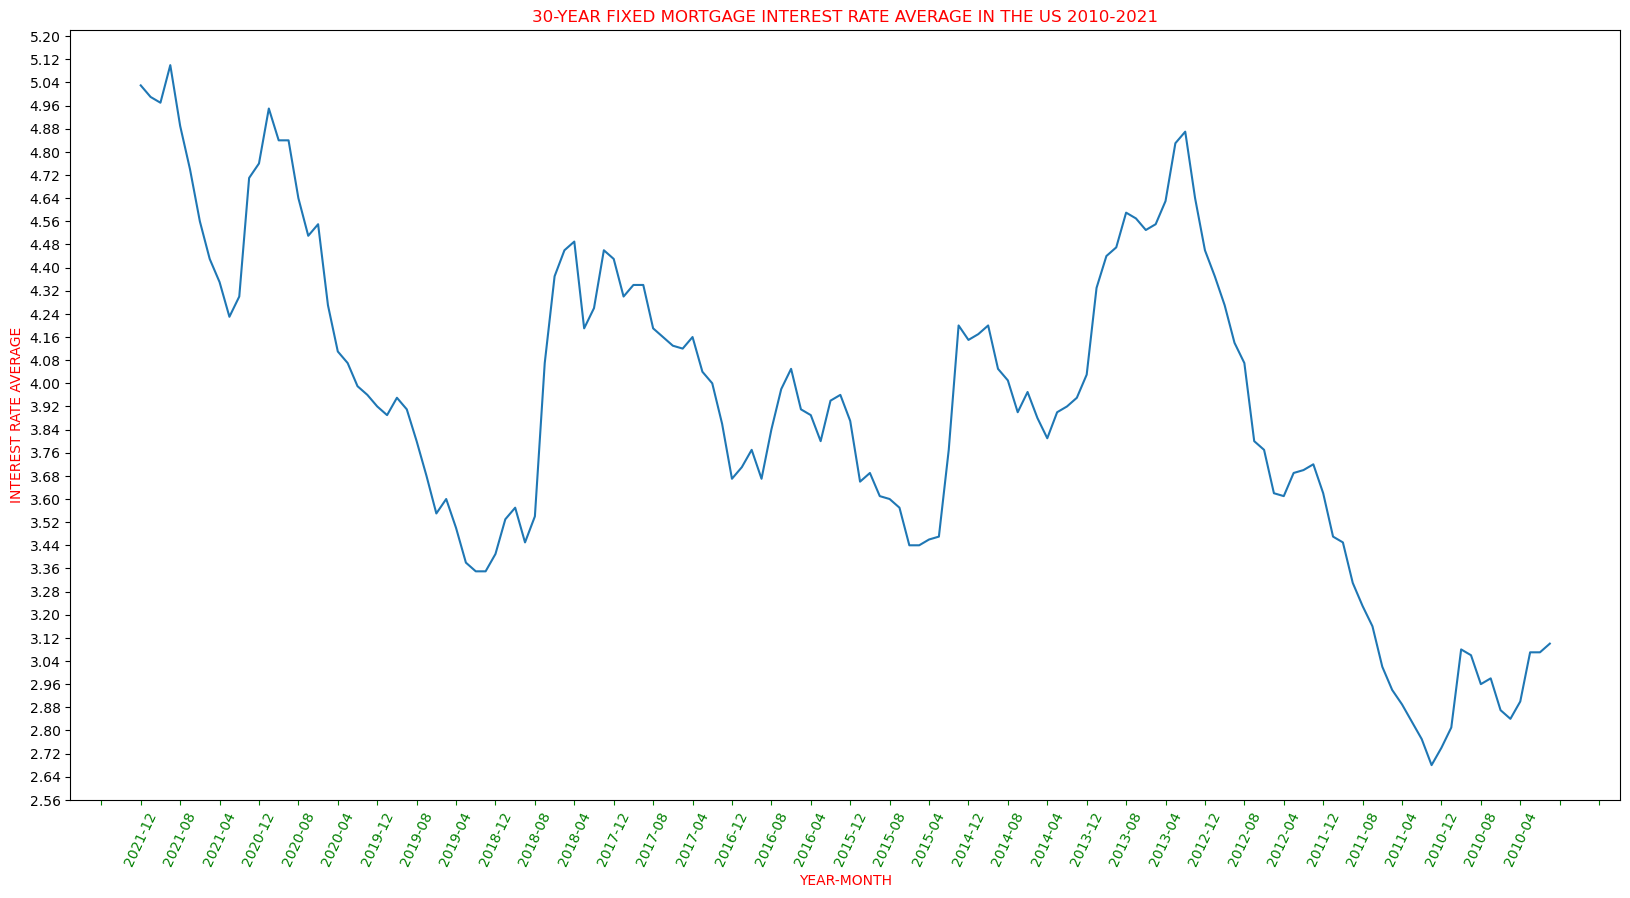

In [790]:
''' 
Freddie Mac, 30_Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US],
retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US
'''
filePath3 = "./Resources/mortgage_interest_rates_fred_2010_2021.csv"
if not os.path.isfile(filePath3):
    url = "https://api.stlouisfed.org/fred/series/observations?series_id=MORTGAGE30US&observation_start=2010-01-01&observation_end=2021-12-31&frequency=m&file_type=json&api_key=" + fred_key
    res = requests.get(url)
    fred_data = json.loads(res.text)  #reuturns the interest rate per year 
    fred_data = pd.DataFrame.from_dict(fred_data['observations'])
    fred_data.to_csv(filePath3)
    fred_data = pd.read_csv(filePath3)
    fred_data.to_csv(filePath3)
else:
    fred_data = pd.read_csv(filePath3)
# interest Rate mortgate per year need to get the MEAN per year to match the data from 2010 to 2021 and make a correlation against other sets like inflation, and interest rates for the graphs.  
fred_data.to_csv(filePath3)
fred_data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
fred_data = fred_data.loc[:, ~fred_data.columns.str.contains('^Unnamed')]
fred_data = fred_data.rename({"value":"30_Year_Fixed_Rate_Mortgage_Average", "date":"Date"}, axis=1)
fred_data = fred_data[["Date","30_Year_Fixed_Rate_Mortgage_Average"]]
fred_data["Date"] = fred_data["Date"].str[:-3]
# fred_data['Date'] = pd.to_datetime(fred_data["Date"].dt.strftime('%Y-%m'))
fig, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('30-YEAR FIXED MORTGAGE INTEREST RATE AVERAGE IN THE US 2010-2021')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('INTEREST RATE AVERAGE')
ax.yaxis.set_major_locator(plt.MaxNLocator(40))
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
# ax.plot(fred_data['Date'], fred_data['30_Year_Fixed_Rate_Mortgage_Average'])
ax.plot(fred_data['Date'][::-1], fred_data['30_Year_Fixed_Rate_Mortgage_Average'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output

plt.savefig("./Resources/30_Year_Fixed_Rate_Mortgage_Average_2010_2021.png")  
fred_data.head()

,Date,hourly_earnings
0,2010-01,22.16
1,2010-02,22.23
2,2010-03,22.14
3,2010-04,22.19
4,2010-05,22.27


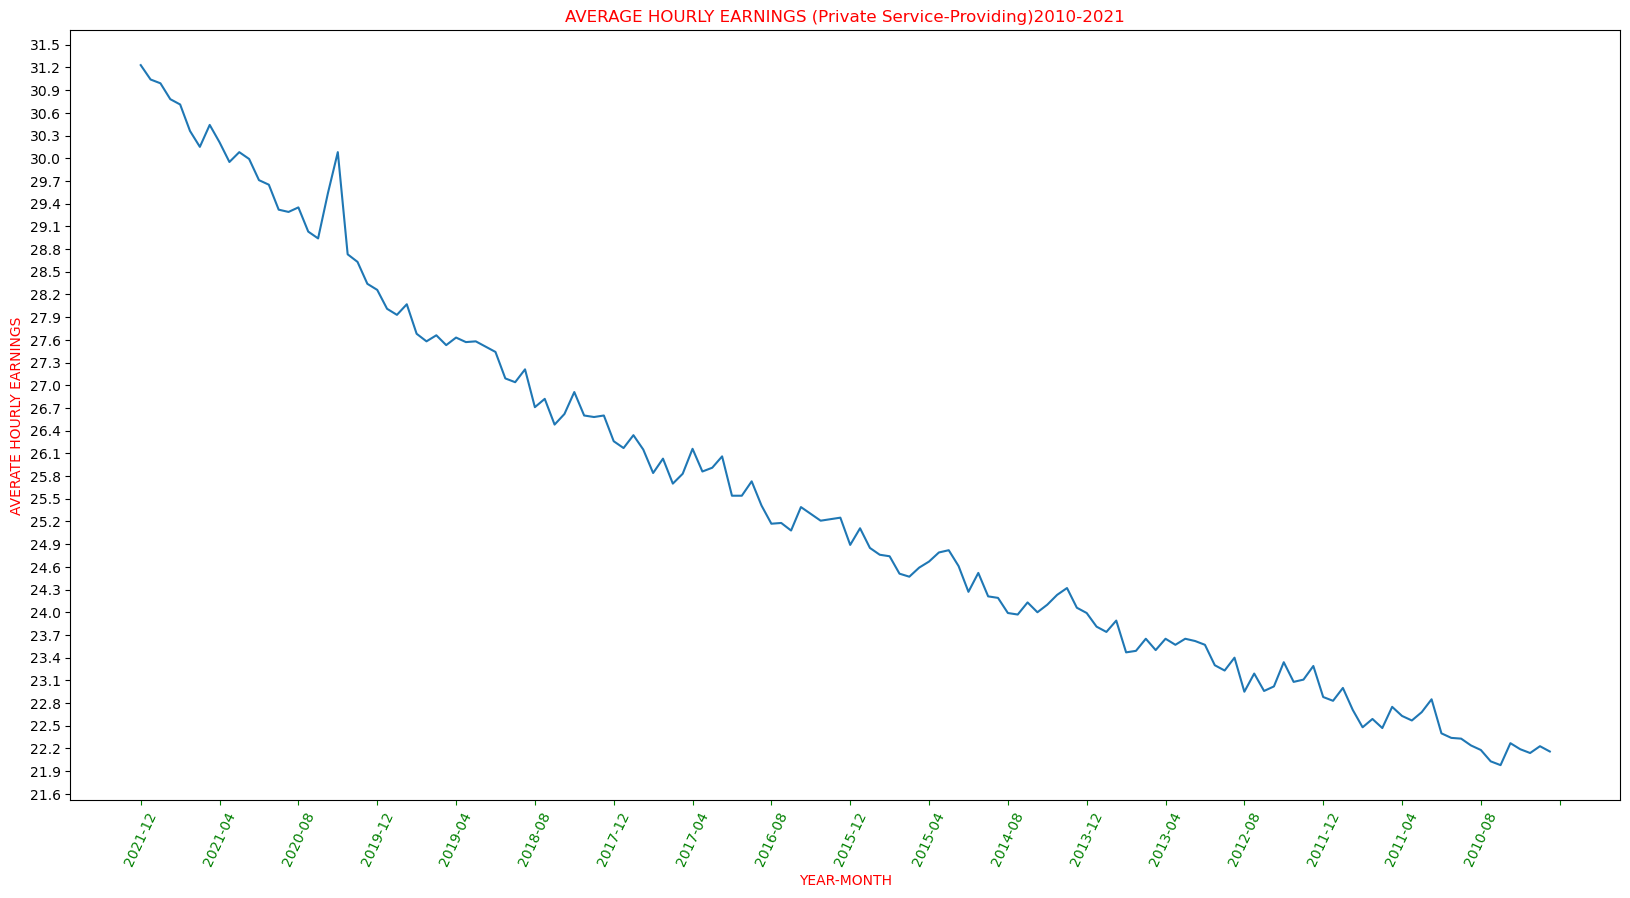

In [791]:
''' 
U.S. Bureau of Labor Statistics, Average Hourly Earnings of All Employees, Private Service-Providing [CEU0800000003], 
retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CEU0800000003,
'''
filePath = "./Resources/hourly_earnings_rate_fred_2010_2021.csv"
if not os.path.isfile(filePath):
    url = "https://api.stlouisfed.org/fred/series/observations?series_id=CEU0800000003&observation_start=2010-01-01&observation_end=2021-12-31&frequency=m&file_type=json&api_key=" + fred_key
    res = requests.get(url)
    ave_hourly_data = json.loads(res.text)  #reuturns the interest rate per year 
    ave_hourly_data = pd.DataFrame.from_dict(ave_hourly_data['observations'])
    ave_hourly_data.to_csv(filePath)
    ave_hourly_data = pd.read_csv(filePath)
    ave_hourly_data.to_csv(filePath)
else:
    ave_hourly_data = pd.read_csv(filePath)
# interest Rate mortgate per year need to get the MEAN per year to match the data from 2010 to 2021 and make a correlation against other sets like inflation, and interest rates for the graphs.  
ave_hourly_data.to_csv(filePath)
ave_hourly_data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
ave_hourly_data = ave_hourly_data.loc[:, ~ave_hourly_data.columns.str.contains('^Unnamed')]
ave_hourly_data = ave_hourly_data.rename({"value":"hourly_earnings", "date":"Date"}, axis=1)
ave_hourly_data = ave_hourly_data[["Date","hourly_earnings"]]
ave_hourly_data["Date"] = ave_hourly_data["Date"].str[:-3]
# fred_data['Date'] = pd.to_datetime(fred_data["Date"].dt.strftime('%Y-%m'))
fig, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('AVERAGE HOURLY EARNINGS (Private Service-Providing)2010-2021')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('AVERATE HOURLY EARNINGS')
ax.yaxis.set_major_locator(plt.MaxNLocator(40))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# ax.plot(fred_data['Date'], fred_data['hourly_hourly_earnings'])
ax.plot(ave_hourly_data['Date'][::-1], ave_hourly_data['hourly_earnings'][::-1])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/hourly_earnings_2010_2021.png")  

ave_hourly_data.head()

,Date,unemployment_rate
0,2021-12,3.9
1,2021-11,4.2
2,2021-10,4.6
3,2021-09,4.7
4,2021-08,5.2


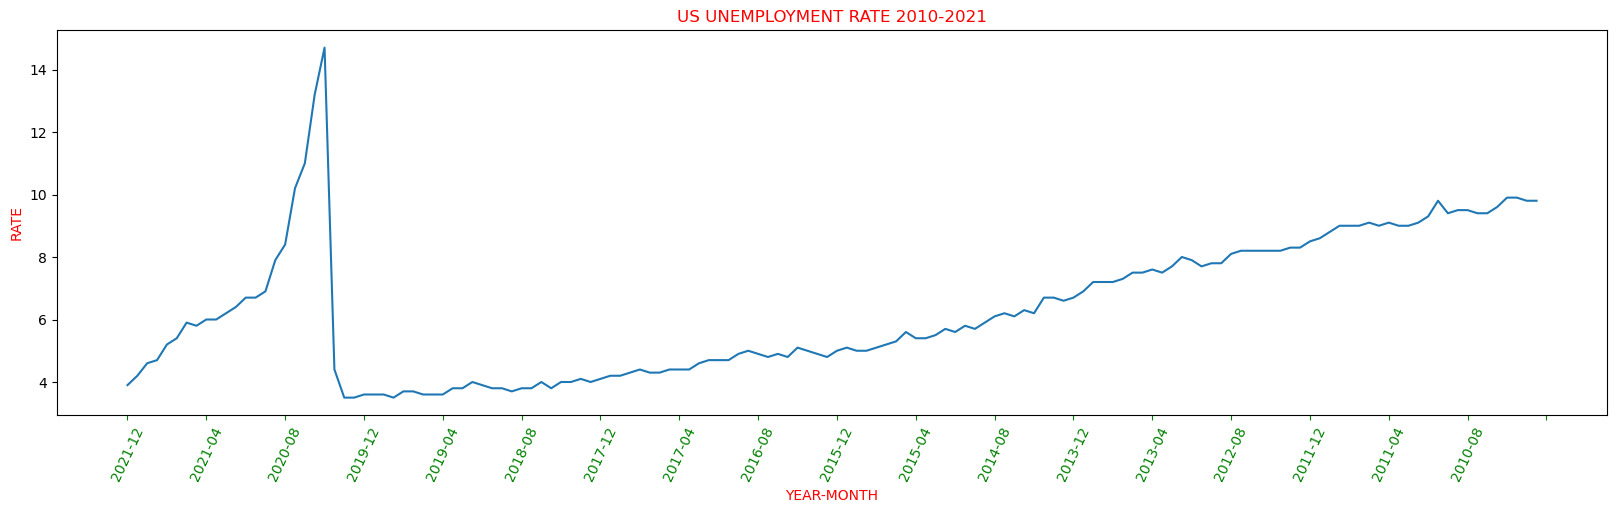

In [792]:
''' 
The unemployment rate represents the number of unemployed as a percentage of the labor force. 
Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, 
who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces. 
'''

filePath5 = "./Resources/unemployment_2010_2021.csv"
if not os.path.isfile(filePath5):
    unemploymentRateData = nasdaqdatalink.get("FRED/UNRATE", start_date="2010-01-01", end_date="2021-12-31")
    unplmnt_pd = pd.DataFrame(unemploymentRateData)
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.iloc[::-1]
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.loc[:, ~unplmnt_pd.columns.str.contains('^Unnamed')]
    unplmnt_pd.to_csv(filePath5)
    unplmnt_pd = pd.read_csv(filePath5)
    unplmnt_pd.to_csv(filePath5)
else:
    unplmnt_pd = pd.read_csv(filePath5) # index_col=[0], header=False
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.loc[:, ~unplmnt_pd.columns.str.contains('^Unnamed')]
    
unplmnt_pd["Date"] = unplmnt_pd["Date"].str[:-3]
unplmnt_pd = unplmnt_pd.rename({"Value":"unemployment_rate"}, axis=1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('US UNEMPLOYMENT RATE 2010-2021')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('RATE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(unplmnt_pd['Date'], unplmnt_pd['unemployment_rate'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/unemployment_2010_2021.png")    
unplmnt_pd.head()


,Date,single_family_home_value
14,2021-12,322050.0
15,2021-11,317665.0
16,2021-10,313749.0
17,2021-09,309609.0
18,2021-08,304933.0


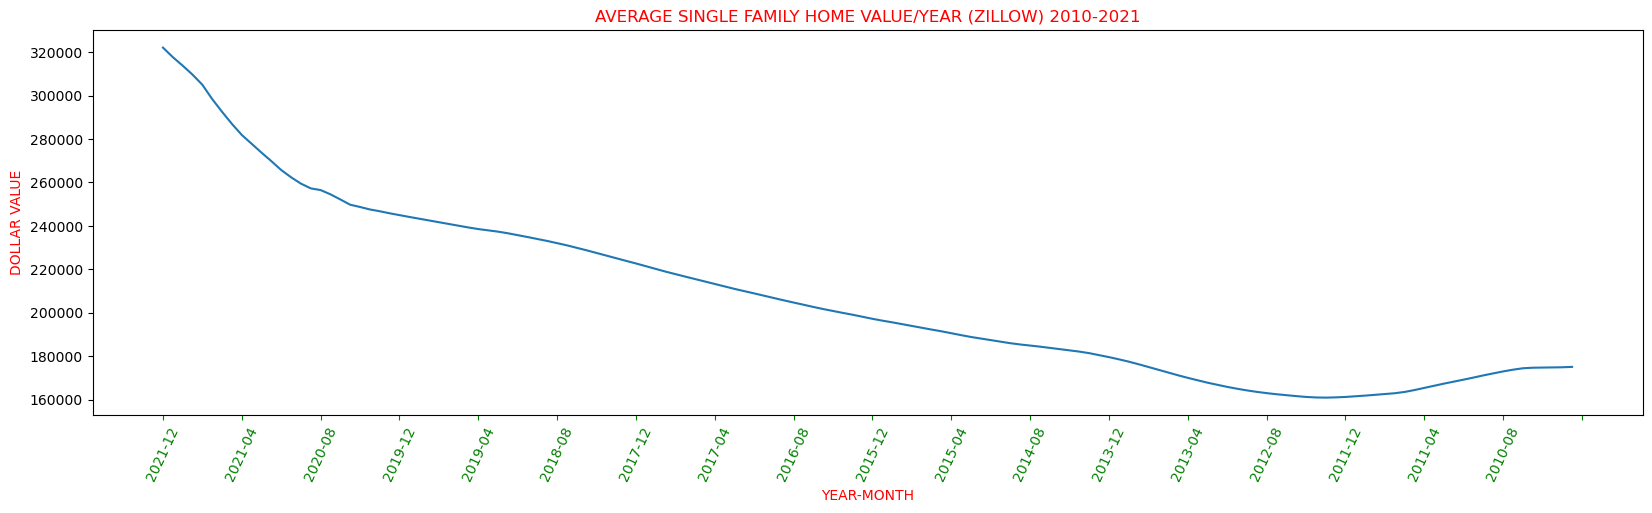

In [793]:
''' 
HOME VALUES INDICATOR Single Family Home value ZSFH 
The USA region code 102001
'''
filePath4 = "./Resources/zillosSFH_2010_2021.csv"
if not os.path.isfile(filePath4):
    zurl = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=102001&api_key=" + nasdaq_key
    zres = requests.get(zurl)
    zjson = json.loads(zres.text)
    zjson_pd = pd.DataFrame(zjson['datatable']['data'])
    zjson_pd.to_csv(filePath4)
    zjson_pd = pd.read_csv(filePath4)
    zjson_pd.to_csv(filePath4)
else:
    zjson_pd = pd.read_csv(filePath4)
zjson_pd.reset_index()

zjson_pd = zjson_pd.rename({"2":"Date", "3":"Value"}, axis=1)
zjson_pd = zjson_pd[['Date', 'Value']]
zjson_pd["Date"] = zjson_pd["Date"].str[:-3]
zjson_pd = zjson_pd[(zjson_pd['Date'] > '2009-12-31') & (zjson_pd['Date'] <= '2021-12-31')]
zjson_pd = zjson_pd.rename({"Value":"single_family_home_value"}, axis=1)
# zjson_pd["Date"] = unplmnt_pd["Date"].str[:-3]
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('AVERAGE SINGLE FAMILY HOME VALUE/YEAR (ZILLOW) 2010-2021')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('DOLLAR VALUE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(zjson_pd['Date'], zjson_pd['single_family_home_value'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/zillow_SFH_val_2010_2021.png")
zjson_pd.head()

,Date,inflation_percentage
0,2021-12,280.126
1,2021-11,278.524
2,2021-10,276.590
3,2021-09,274.214
4,2021-08,273.092


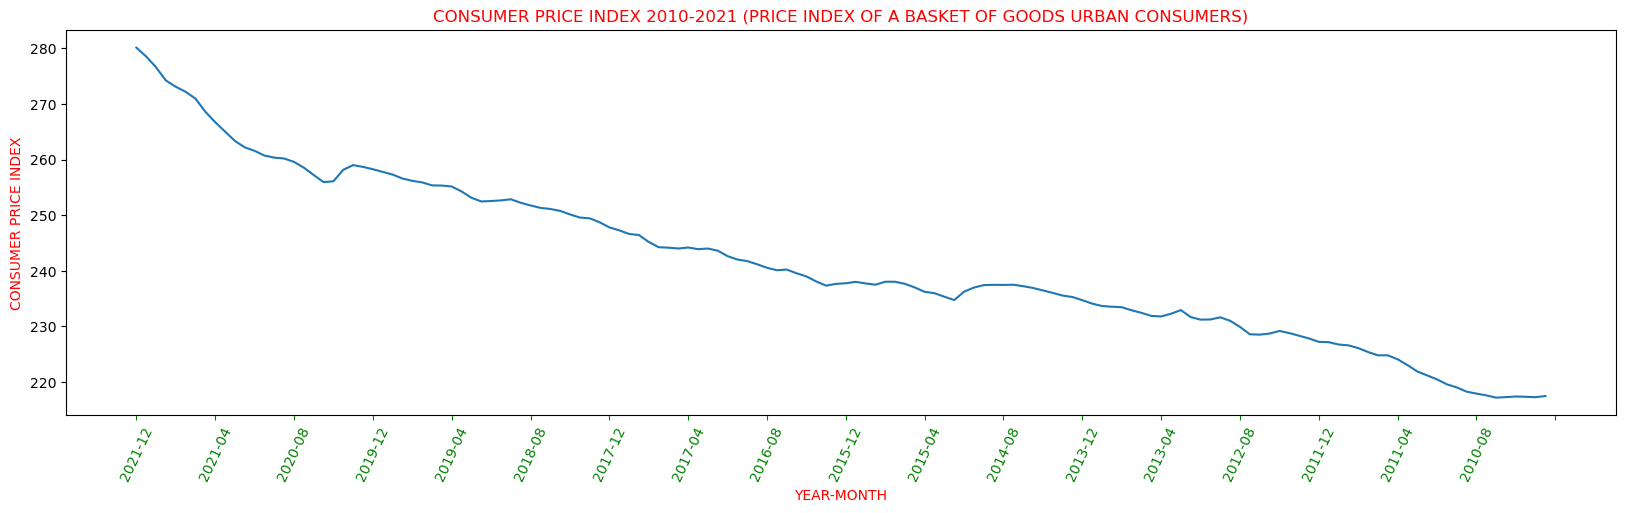

In [794]:
#  CPIAUCSL Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
''' 
The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. 
Percent changes in the price index measure the inflation rate between any two time periods. 
The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers.
This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, 
self-employed, short-term workers, unemployed, retirees, and those not in the labor force. 
'''

filePath6 = "./Resources/inflation_fred_2010_2021.csv"
if not os.path.isfile(filePath6):
    inflationData = nasdaqdatalink.get("FRED/CPIAUCSL", start_date="2010-01-01", end_date="2021-12-31", collapse='monthly')
    inflation_pd = pd.DataFrame(inflationData)
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    inflation_pd = inflation_pd.iloc[::-1] # invert the x axis so all the plots are displayed in the same direction. 
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    inflation_pd = inflation_pd.loc[:, ~inflation_pd.columns.str.contains('^Unnamed')] #removed the Unnamed columns created everytime we had to collect data. 
    inflation_pd.to_csv(filePath6) #save it
    inflation_pd = pd.read_csv(filePath6) # reading it formats it 
    inflation_pd.to_csv(filePath6) # save it again formmated. 
else:
    inflation_pd = pd.read_csv(filePath6) # index_col=[0], header=False
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='') 
    inflation_pd = inflation_pd.loc[:, ~inflation_pd.columns.str.contains('^Unnamed')]

inflation_pd["Date"] = inflation_pd["Date"].str[:-3] # for mat the date for better display on the graph. 
inflation_pd = inflation_pd.rename({"Value":"inflation_percentage"}, axis=1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('CONSUMER PRICE INDEX 2010-2021 (PRICE INDEX OF A BASKET OF GOODS URBAN CONSUMERS)')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('CONSUMER PRICE INDEX')
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # distribute the x axis values so they are not too crammed. 
ax.plot(inflation_pd['Date'], inflation_pd['inflation_percentage'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/inflation_fred_2010_2021.png")    
inflation_pd.head()

,Date,Value
0,2010-01-01,14764.611
1,2010-04-01,14980.193
2,2010-07-01,15141.605
3,2010-10-01,15309.471
4,2011-01-01,15351.444


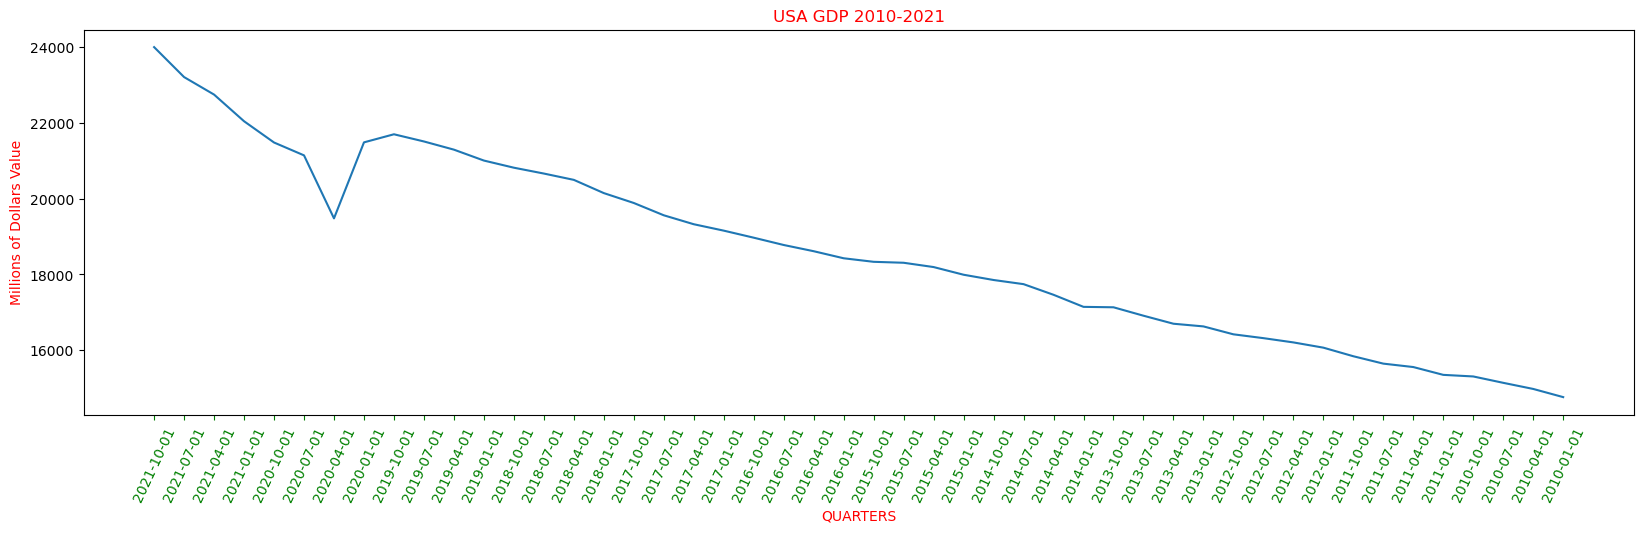

In [795]:
# Gross domestic product is the monetary value of all finished goods and services made within a country during a specific period.
# GDP provides an economic snapshot of a country, used to estimate the size of an economy and its growth rate

''' 
GDP is only available quaterly and does not match the monthly data sets we've been collecting

'''

filePath7 = "./Resources/gdp_2010_2021.csv" 
if not os.path.isfile(filePath7):
    data = nasdaqdatalink.get("FRED/GDP", start_date="2010-01-01", end_date="2021-12-31") 
    gdp_df = pd.DataFrame(data)
    gdp_df.to_csv(filePath7)
    gdp_df = pd.read_csv(filePath7)
    gdp_df.to_csv(filePath7)
else:
    gdp_df = pd.read_csv(filePath7)
    gdp_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    gdp_df = gdp_df.loc[:, ~gdp_df.columns.str.contains('^Unnamed')]
# gdp_df["Date"] = gdp_df["Date"].str[:-3]
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('USA GDP 2010-2021')
ax.set_xlabel('QUARTERS')
ax.set_ylabel('Millions of Dollars Value')
# ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(gdp_df['Date'][::-1], gdp_df['Value'][::-1])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/gdp_2010_2021.png")    
gdp_df.head()


In [796]:
# Data Frames
'''

fred_data 30 yr fixed interest
inflation_pd
zjson_pd single home value indicator
unplmnt_pd
ave_hourly_data
gdp_df in quaters
'''

data_frames = [fred_data, inflation_pd, zjson_pd, unplmnt_pd,ave_hourly_data]
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Date'],  how='outer'), data_frames)  # can merge all 4 dfs like this also.
# df_merged = pd.merge(fred_data, inflation_pd, on='Date', how='outer').merge(zjson_pd, on='Date', how='outer').merge(unplmnt_pd, on='Date', how='outer') merging like this causes errors below. 
df_merged.head()




,Date,30_Year_Fixed_Rate_Mortgage_Average,inflation_percentage,single_family_home_value,unemployment_rate,hourly_earnings
0,2010-01,5.03,217.488,175042.0,9.8,22.16
1,2010-02,4.99,217.281,174864.0,9.8,22.23
2,2010-03,4.97,217.353,174738.0,9.9,22.14
3,2010-04,5.10,217.403,174720.0,9.9,22.19
4,2010-05,4.89,217.290,174660.0,9.6,22.27


-0.616

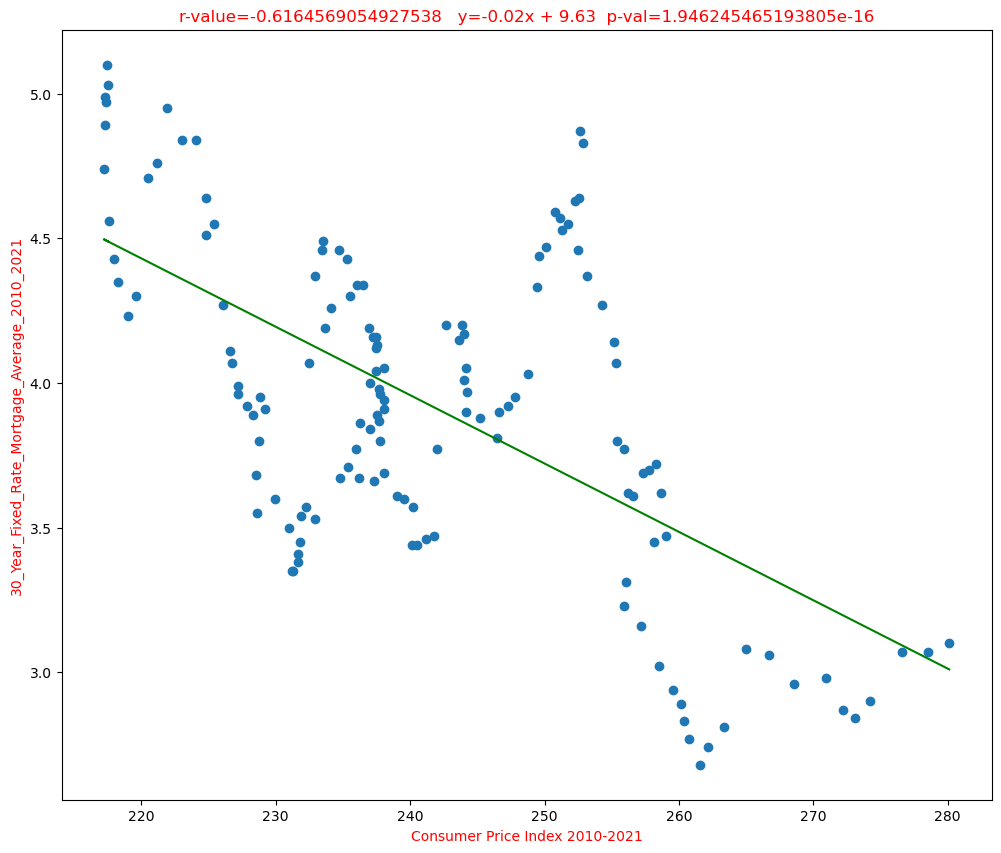

In [797]:
def linearRegressionPlot(df_x_axis, df_y_axis, xlable, ylabel):
    scipy_linear_model = st.stats.linregress(df_x_axis, df_y_axis) # scipy_linear_model
    rvalue = scipy_linear_model[2]
    text =   "  y=" +  str(round(scipy_linear_model[0], 2)) + "x + " + str(round(scipy_linear_model[1], 2)) + "  p-val=" + str(scipy_linear_model[3])
    # print(scipy_linear_model)
    y_axiz = df_x_axis * scipy_linear_model[0] + scipy_linear_model[1]  # use slope and intercept from scipy_linear_model
    plt.scatter(df_x_axis, df_y_axis)
    plt.plot(df_x_axis, y_axiz ,color="g")
    plt.xlabel(str(xlable))
    plt.ylabel(ylabel)
    plt.title("r-value=" + str(rvalue) + " " + text)
    plt.rcParams["figure.figsize"] = [12, 10]
    plt.rcParams.update({'text.color': "red"})
    # plt.text(2, 40, "The r-value = " + str(rvalue) + "  " + text, fontsize = 12)
    plt.savefig("./Resources/" + xlable + "_" + ylabel + ".png")  
    return(plt)
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged['inflation_percentage'], df_merged['30_Year_Fixed_Rate_Mortgage_Average'], 'Consumer Price Index 2010-2021', '30_Year_Fixed_Rate_Mortgage_Average_2010_2021')
correlation = round(np.corrcoef(df_merged['inflation_percentage'],  df_merged['30_Year_Fixed_Rate_Mortgage_Average'])[1][0], 3)
correlation

0.961

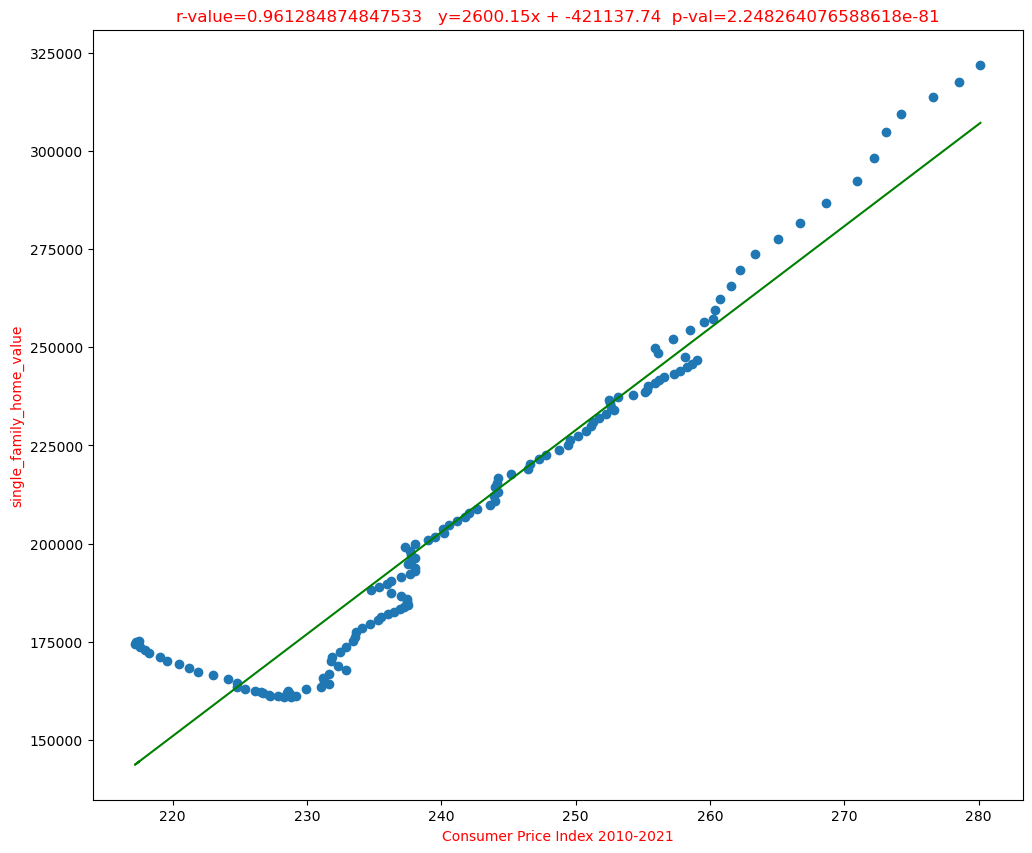

In [798]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged['inflation_percentage'], df_merged['single_family_home_value'], 'Consumer Price Index 2010-2021', 'single_family_home_value')
corr_sfhv_inflation = round(np.corrcoef(df_merged['inflation_percentage'],  df_merged['single_family_home_value'])[1][0], 3)
corr_sfhv_inflation

-0.555

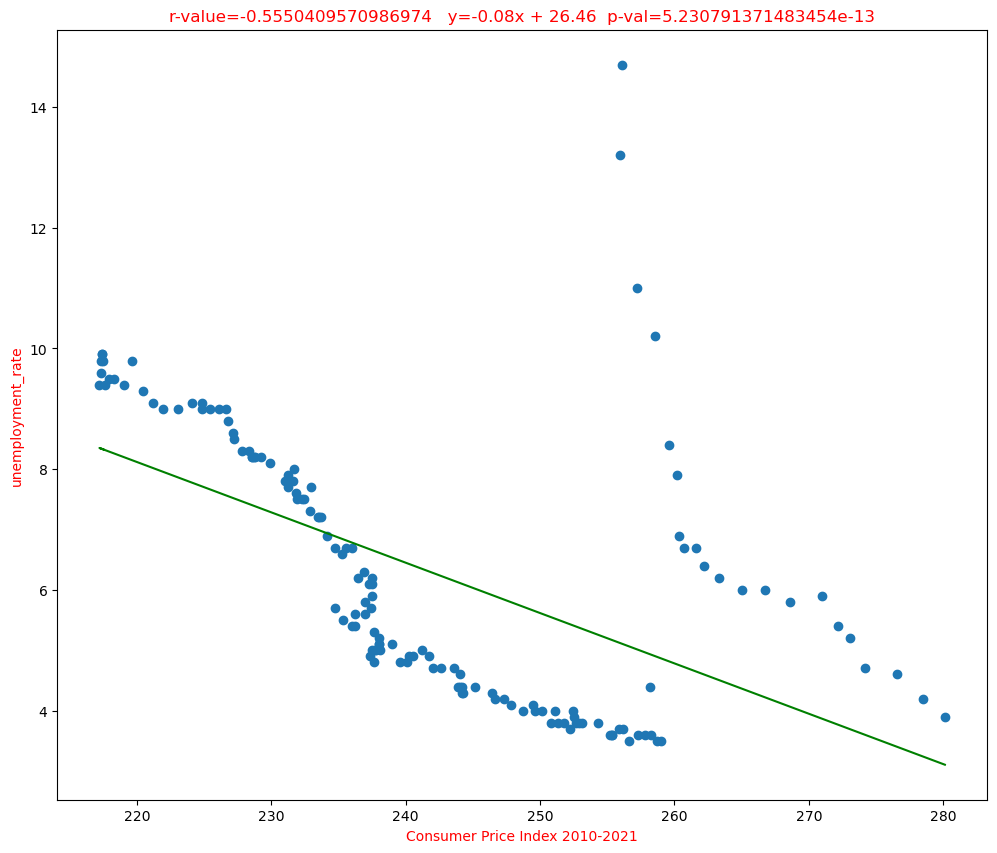

In [799]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged['inflation_percentage'], df_merged['unemployment_rate'], 'Consumer Price Index 2010-2021', 'unemployment_rate')
corr_inflation_unemployment = round([st.pearsonr(df_merged['inflation_percentage'],df_merged['unemployment_rate'])][0].statistic,3)
corr_inflation_unemployment 

0.982

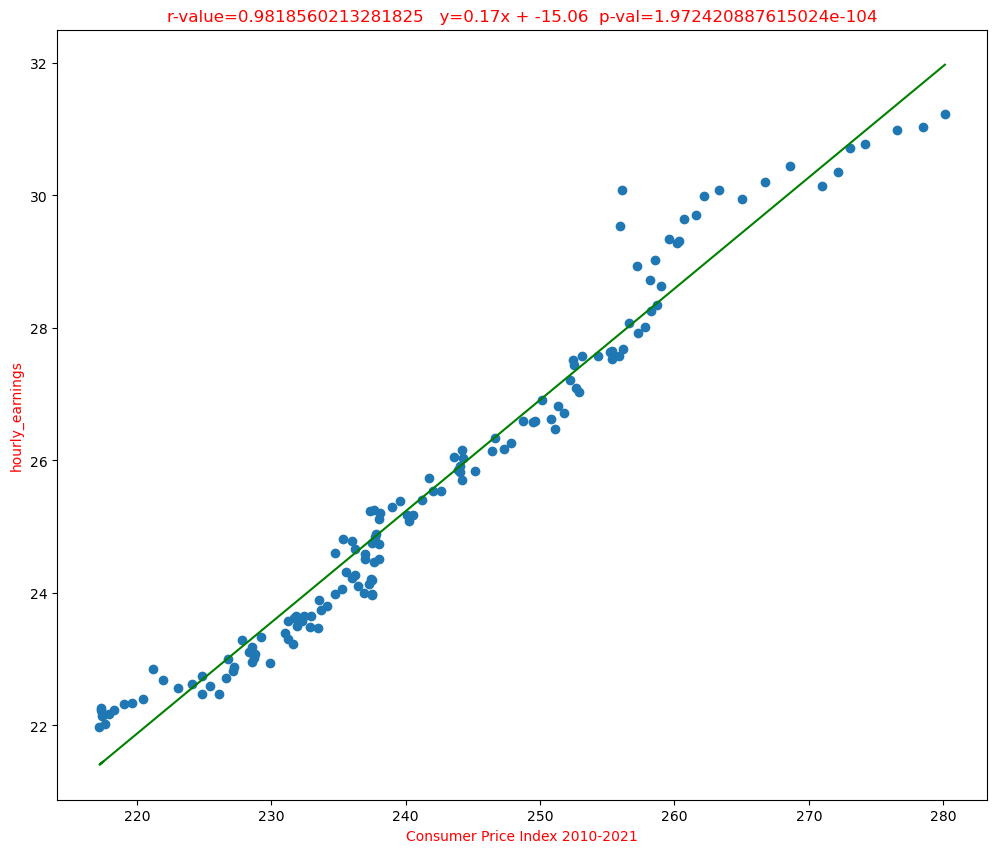

In [800]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
# linearRegressionPlot(df_merged['inflation_percentage'], df_merged['hourly_hourly_earnings'], 'inflation_percentage', 'hourly_hourly_earnings')
linearRegressionPlot(df_merged['inflation_percentage'],  df_merged['hourly_earnings'], 'Consumer Price Index 2010-2021', 'hourly_earnings')
corr_inf_hourlyearning = round(st.linregress(df_merged['inflation_percentage'],df_merged['hourly_earnings']).rvalue, 3)
corr_inf_hourlyearning 

0.961

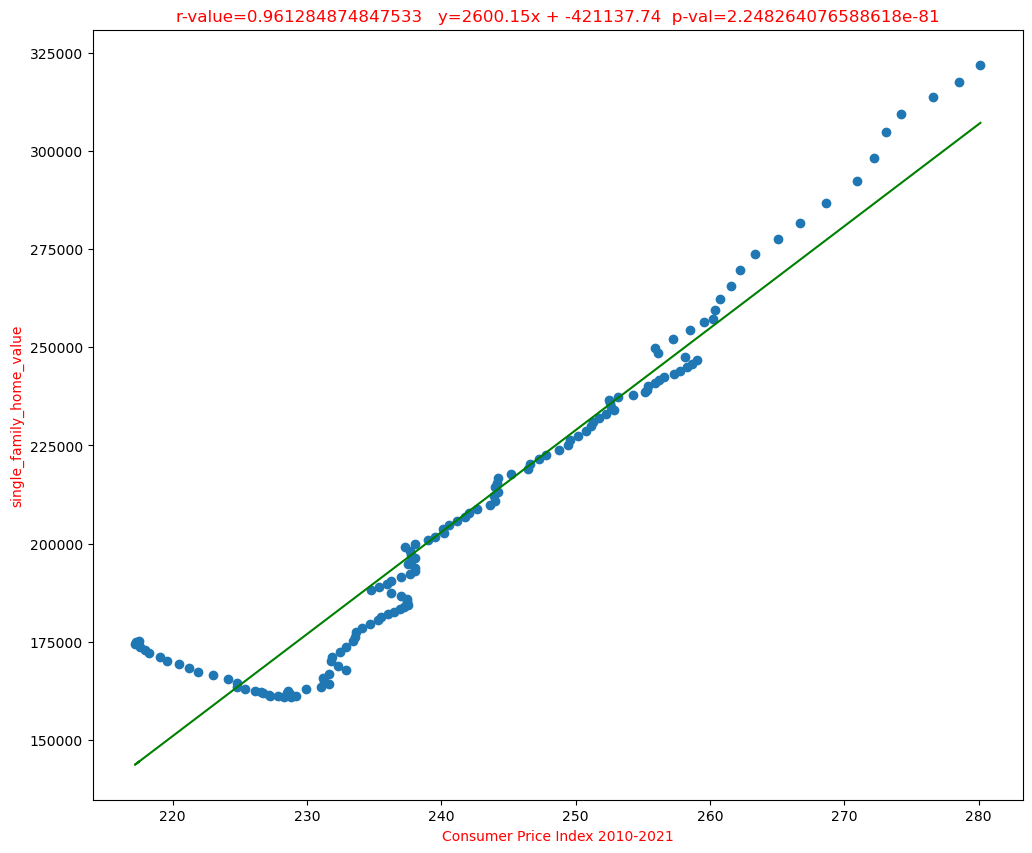

In [801]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged['inflation_percentage'], df_merged['single_family_home_value'], 'Consumer Price Index 2010-2021', 'single_family_home_value')
corr_sfhv_unemployment = round(st.linregress(df_merged['inflation_percentage'],df_merged['single_family_home_value']).rvalue, 3)
corr_sfhv_unemployment

,Date,30_Year_Fixed_Rate_Mortgage_Average
0,2010-01,5.03
1,2010-02,4.99
2,2010-03,4.97
3,2010-04,5.10
4,2010-05,4.89


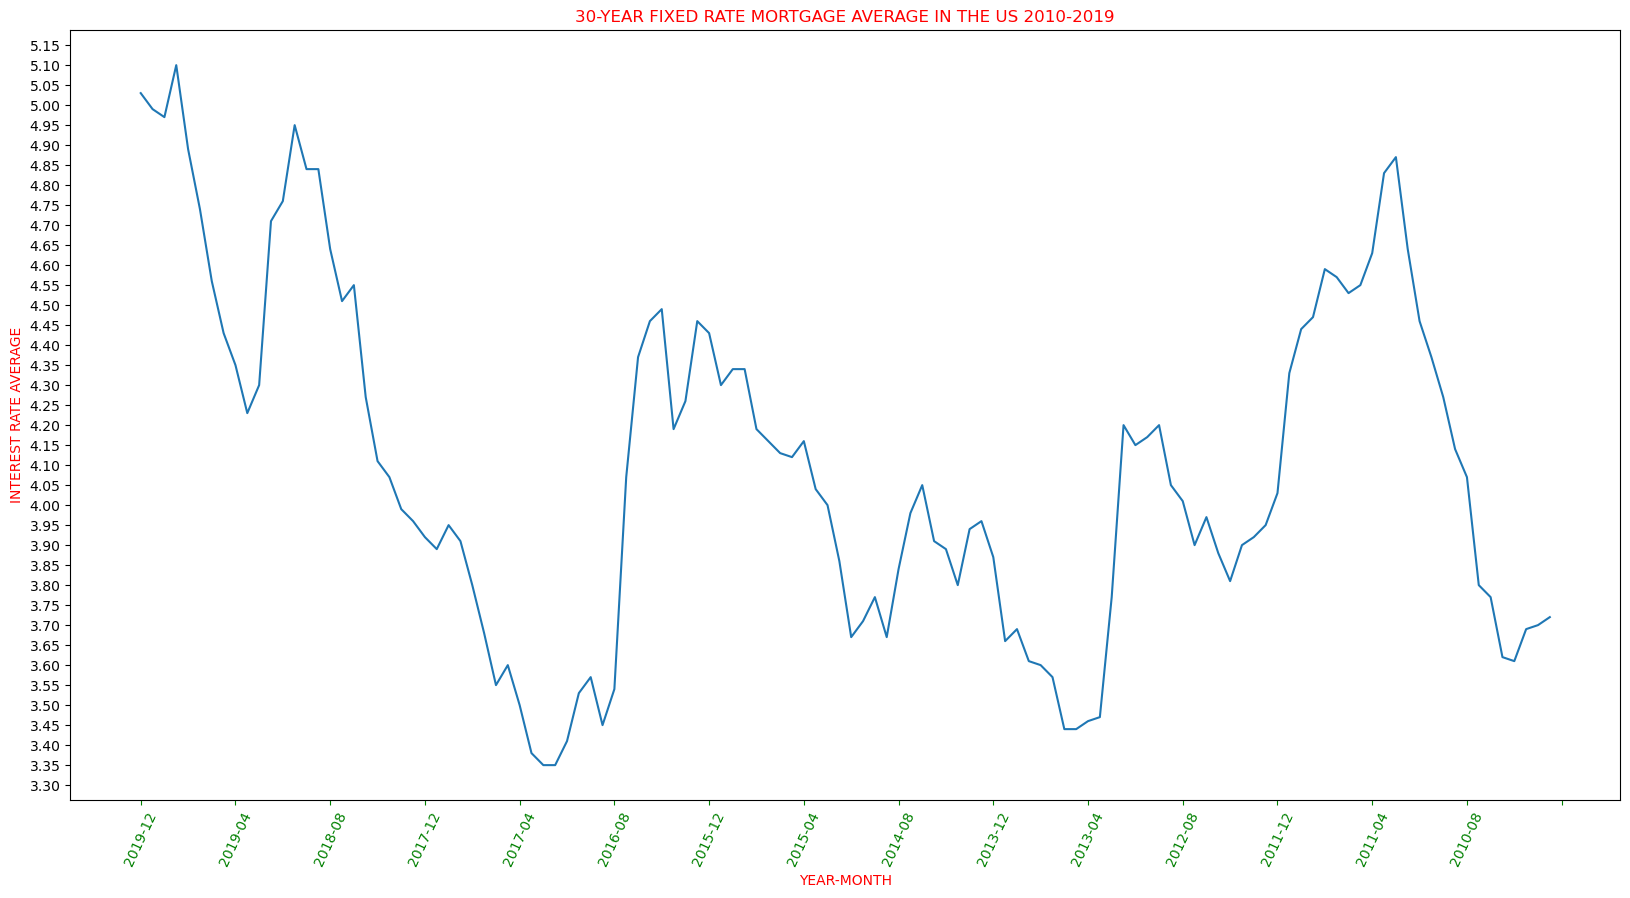

In [802]:
''' 
Freddie Mac, 30_Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US],
retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US
'''
filePath2 = "./Resources/mortgage_interest_rates_fred_2010_2019.csv"
if not os.path.isfile(filePath2):
    url = "https://api.stlouisfed.org/fred/series/observations?series_id=MORTGAGE30US&observation_start=2010-01-01&observation_end=2019-12-31&frequency=m&file_type=json&api_key=" + fred_key
    res = requests.get(url)
    fred_data = json.loads(res.text)  #reuturns the interest rate per year 
    fred_data = pd.DataFrame.from_dict(fred_data['observations'])
    fred_data.to_csv(filePath2)
    fred_data = pd.read_csv(filePath2)
    fred_data.to_csv(filePath2)
else:
    fred_data = pd.read_csv(filePath2)
# interest Rate mortgate per year need to get the MEAN per year to match the data from 2010 to 2021 and make a correlation against other sets like inflation, and interest rates for the graphs.  
fred_data.to_csv(filePath2)
fred_data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
fred_data = fred_data.loc[:, ~fred_data.columns.str.contains('^Unnamed')]
fred_data = fred_data.rename({"value":"30_Year_Fixed_Rate_Mortgage_Average", "date":"Date"}, axis=1)
fred_data = fred_data[["Date","30_Year_Fixed_Rate_Mortgage_Average"]]
fred_data["Date"] = fred_data["Date"].str[:-3]
# fred_data['Date'] = pd.to_datetime(fred_data["Date"].dt.strftime('%Y-%m'))
fig, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('30-YEAR FIXED RATE MORTGAGE AVERAGE IN THE US 2010-2019')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('INTEREST RATE AVERAGE')
ax.yaxis.set_major_locator(plt.MaxNLocator(40))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# ax.plot(fred_data['Date'], fred_data['30_Year_Fixed_Rate_Mortgage_Average'])
ax.plot(fred_data['Date'][::-1], fred_data['30_Year_Fixed_Rate_Mortgage_Average'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/30_Year_Fixed_Rate_Mortgage_Average_2010_2019.png")  
fred_data.head()

,Date,hourly_earnings
0,2010-01,22.16
1,2010-02,22.23
2,2010-03,22.14
3,2010-04,22.19
4,2010-05,22.27


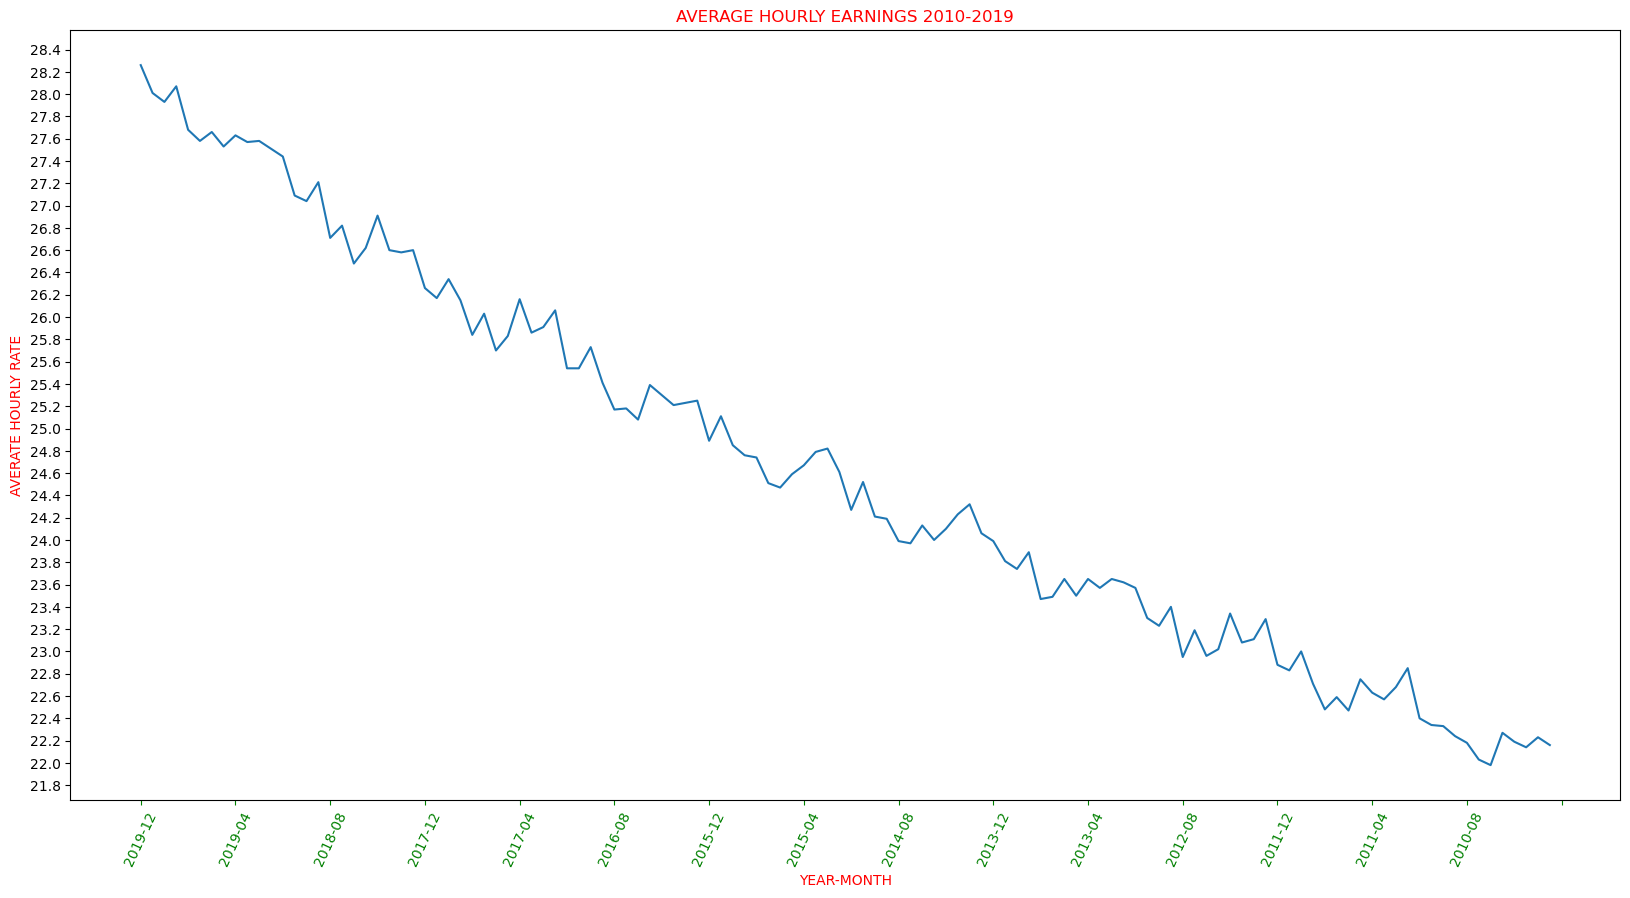

In [803]:
''' 
U.S. Bureau of Labor Statistics, Average Hourly Earnings of All Employees, Private Service-Providing [CEU0800000003], 
retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CEU0800000003,
'''
filePath3 = "./Resources/hourly_earnings_rate_fred_2010_2019.csv"
if not os.path.isfile(filePath3):
    url = "https://api.stlouisfed.org/fred/series/observations?series_id=CEU0800000003&observation_start=2010-01-01&observation_end=2019-12-31&frequency=m&file_type=json&api_key=" + fred_key
    res = requests.get(url)
    ave_hourly_data = json.loads(res.text)  #reuturns the interest rate per year 
    ave_hourly_data = pd.DataFrame.from_dict(ave_hourly_data['observations'])
    ave_hourly_data.to_csv(filePath3)
    ave_hourly_data = pd.read_csv(filePath3)
    ave_hourly_data.to_csv(filePath3)
else:
    ave_hourly_data = pd.read_csv(filePath3)
# interest Rate mortgate per year need to get the MEAN per year to match the data from 2010 to 2021 and make a correlation against other sets like inflation, and interest rates for the graphs.  
ave_hourly_data.to_csv(filePath3)
ave_hourly_data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
ave_hourly_data = ave_hourly_data.loc[:, ~ave_hourly_data.columns.str.contains('^Unnamed')]
ave_hourly_data = ave_hourly_data.rename({"value":"hourly_earnings", "date":"Date"}, axis=1)
ave_hourly_data = ave_hourly_data[["Date","hourly_earnings"]]
ave_hourly_data["Date"] = ave_hourly_data["Date"].str[:-3]
# fred_data['Date'] = pd.to_datetime(fred_data["Date"].dt.strftime('%Y-%m'))
fig, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('AVERAGE HOURLY EARNINGS 2010-2019')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('AVERATE HOURLY RATE')
ax.yaxis.set_major_locator(plt.MaxNLocator(40))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# ax.plot(fred_data['Date'], fred_data['hourly_hourly_earnings'])
ax.plot(ave_hourly_data['Date'][::-1], ave_hourly_data['hourly_earnings'][::-1])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/hourly_earnings_2010_2019.png")  

ave_hourly_data.head()

,Date,unemployment_rate
0,2019-12,3.6
1,2019-11,3.6
2,2019-10,3.6
3,2019-09,3.5
4,2019-08,3.7


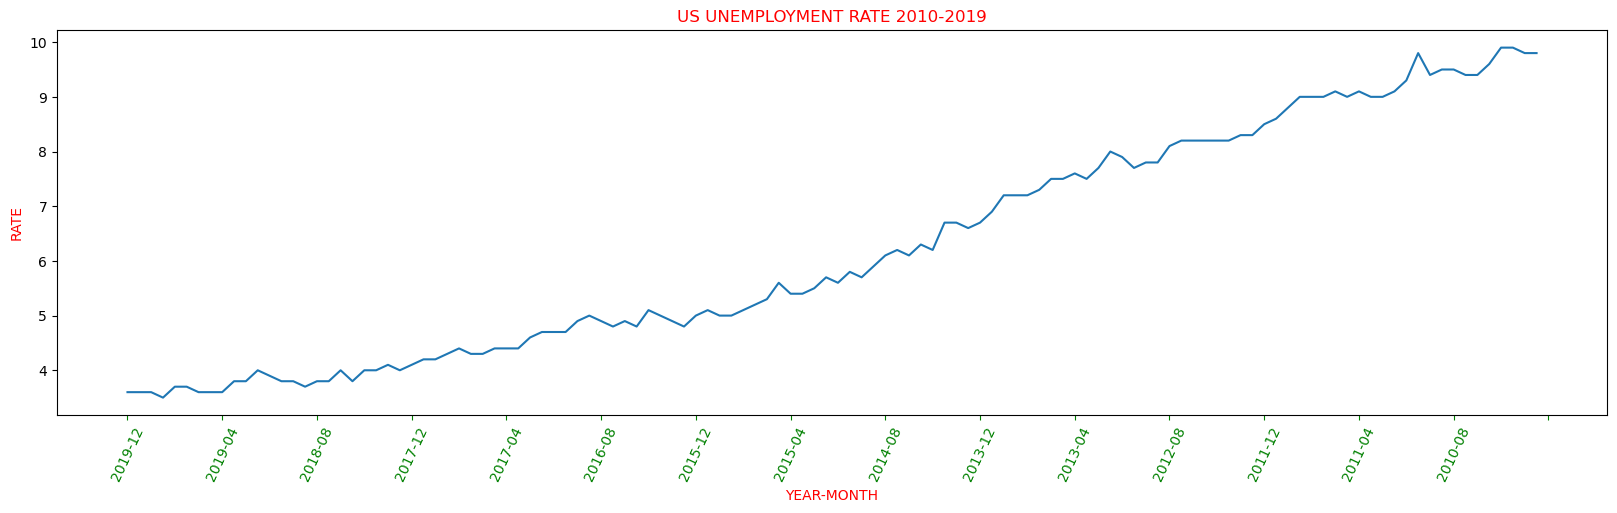

In [804]:
''' 
The unemployment rate represents the number of unemployed as a percentage of the labor force. 
Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, 
who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces. 
'''

filePath5 = "./Resources/unemployment_2010_2019.csv"
if not os.path.isfile(filePath5):
    unemploymentRateData = nasdaqdatalink.get("FRED/UNRATE", start_date="2010-01-01", end_date="2019-12-31")
    unplmnt_pd = pd.DataFrame(unemploymentRateData)
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.iloc[::-1]
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.loc[:, ~unplmnt_pd.columns.str.contains('^Unnamed')]
    unplmnt_pd.to_csv(filePath5)
    unplmnt_pd = pd.read_csv(filePath5)
    unplmnt_pd.to_csv(filePath5)
else:
    unplmnt_pd = pd.read_csv(filePath5) # index_col=[0], header=False
    unplmnt_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    unplmnt_pd = unplmnt_pd.loc[:, ~unplmnt_pd.columns.str.contains('^Unnamed')]
    
unplmnt_pd["Date"] = unplmnt_pd["Date"].str[:-3]
unplmnt_pd = unplmnt_pd.rename({"Value":"unemployment_rate"}, axis=1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('US UNEMPLOYMENT RATE 2010-2019')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('RATE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(unplmnt_pd['Date'], unplmnt_pd['unemployment_rate'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/unemployment_2010_2019.png")    
unplmnt_pd.head()


,Date,single_family_home_value
38,2019-12,244909.0
39,2019-11,244088.0
40,2019-10,243283.0
41,2019-09,242460.0
42,2019-08,241651.0


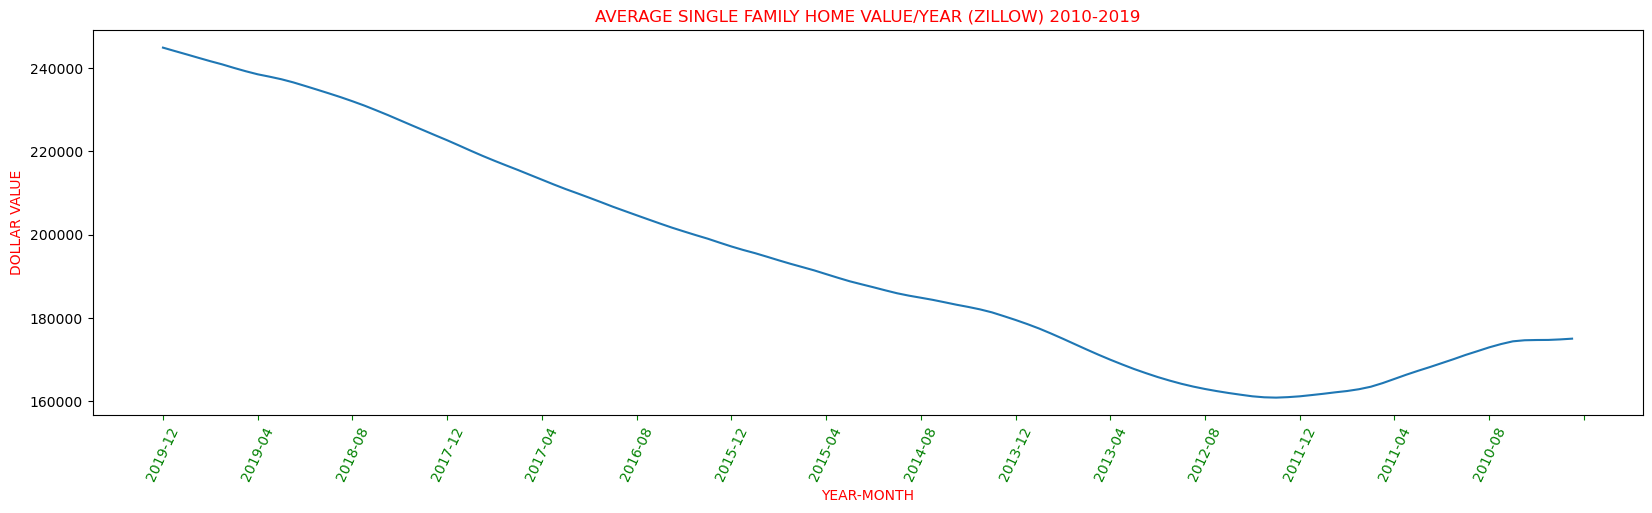

In [805]:
''' 
HOME VALUES INDICATOR Single Family Home value ZSFH 
The USA region code 102001
'''
filePath4 = "./Resources/zillosSFH_2010_2019.csv"
if not os.path.isfile(filePath4):
    zurl = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=102001&api_key=" + nasdaq_key
    zres = requests.get(zurl)
    zjson = json.loads(zres.text)
    zjson_pd = pd.DataFrame(zjson['datatable']['data'])
    zjson_pd.to_csv(filePath4)
    zjson_pd = pd.read_csv(filePath4)
    zjson_pd.to_csv(filePath4)
else:
    zjson_pd = pd.read_csv(filePath4)
zjson_pd.reset_index()

zjson_pd = zjson_pd.rename({"2":"Date", "3":"Value"}, axis=1)
zjson_pd = zjson_pd[['Date', 'Value']]
zjson_pd["Date"] = zjson_pd["Date"].str[:-3]
zjson_pd = zjson_pd[(zjson_pd['Date'] > '2009-12-31') & (zjson_pd['Date'] <= '2019-12-31')]
zjson_pd = zjson_pd.rename({"Value":"single_family_home_value"}, axis=1)
# zjson_pd["Date"] = unplmnt_pd["Date"].str[:-3]
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('AVERAGE SINGLE FAMILY HOME VALUE/YEAR (ZILLOW) 2010-2019')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('DOLLAR VALUE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(zjson_pd['Date'], zjson_pd['single_family_home_value'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/zillow_SFH_val_2010_2019.png")
zjson_pd.head()

,Date,inflation_percentage
0,2019-12,258.263
1,2019-11,257.788
2,2019-10,257.305
3,2019-09,256.596
4,2019-08,256.179


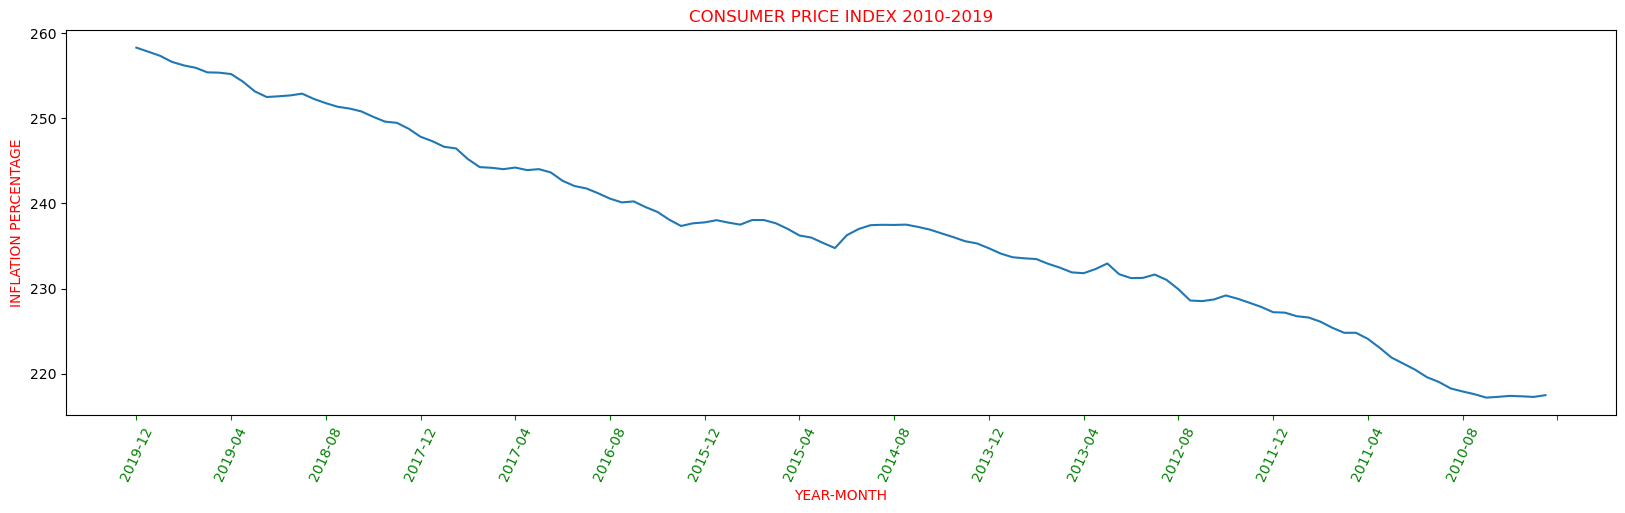

In [806]:
#  CPIAUCSL Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
''' 
The c for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. 
Percent changes in the price index measure the inflation rate between any two time periods. 
The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers.
This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, 
self-employed, short-term workers, unemployed, retirees, and those not in the labor force. 
'''

filePath6 = "./Resources/inflation_fred_2010_2019.csv"
if not os.path.isfile(filePath6):
    inflationData = nasdaqdatalink.get("FRED/CPIAUCSL", start_date="2010-01-01", end_date="2019-12-31", collapse='monthly')
    inflation_pd = pd.DataFrame(inflationData)
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    inflation_pd = inflation_pd.iloc[::-1] # invert the x axis so all the plots are displayed in the same direction. 
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    inflation_pd = inflation_pd.loc[:, ~inflation_pd.columns.str.contains('^Unnamed')] #removed the Unnamed columns created everytime we had to collect data. 
    inflation_pd.to_csv(filePath6) #save it
    inflation_pd = pd.read_csv(filePath6) # reading it formats it s
    inflation_pd.to_csv(filePath6) # save it again formmated. 
else:
    inflation_pd = pd.read_csv(filePath6) # index_col=[0], header=False
    inflation_pd.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='') 
    inflation_pd = inflation_pd.loc[:, ~inflation_pd.columns.str.contains('^Unnamed')]

inflation_pd["Date"] = inflation_pd["Date"].str[:-3] # for mat the date for better display on the graph. 
inflation_pd = inflation_pd.rename({"Value":"inflation_percentage"}, axis=1)
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('CONSUMER PRICE INDEX 2010-2019')
ax.set_xlabel('YEAR-MONTH')
ax.set_ylabel('INFLATION PERCENTAGE')
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # distribute the x axis values so they are not too crammed. 
ax.plot(inflation_pd['Date'], inflation_pd['inflation_percentage'])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/inflation_fred_2010_2019.png")    
inflation_pd.head()

,Date,Value
0,2010-01-01,14764.611
1,2010-04-01,14980.193
2,2010-07-01,15141.605
3,2010-10-01,15309.471
4,2011-01-01,15351.444


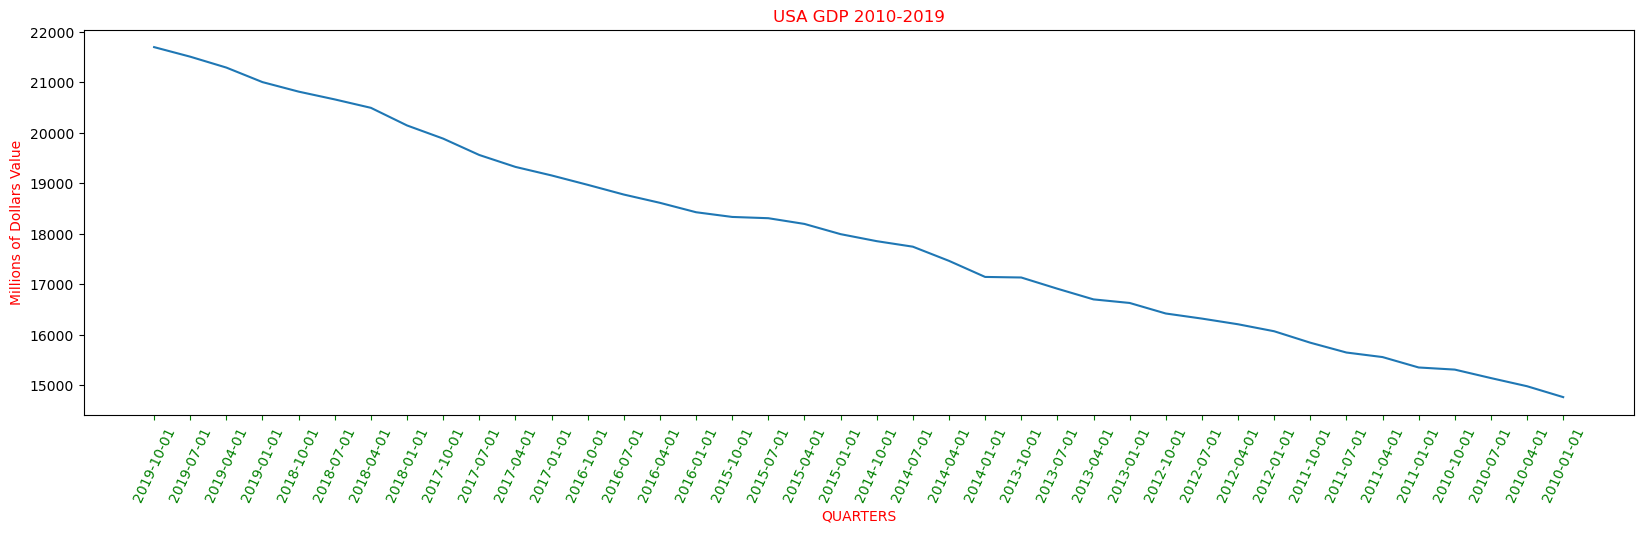

In [807]:
# Gross domestic product is the monetary value of all finished goods and services made within a country during a specific period.
# GDP provides an economic snapshot of a country, used to estimate the size of an economy and its growth rate

''' 
GDP is only available quaterly and does not match the monthly data sets we've been collecting

'''

filePath7 = "./Resources/gdp_2010_2019.csv" 
if not os.path.isfile(filePath7):
    data = nasdaqdatalink.get("FRED/GDP", start_date="2010-01-01", end_date="2019-12-31") 
    gdp_df = pd.DataFrame(data)
    gdp_df.to_csv(filePath7)
    gdp_df = pd.read_csv(filePath7)
    gdp_df.to_csv(filePath7)
else:
    gdp_df = pd.read_csv(filePath7)
    gdp_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    gdp_df = gdp_df.loc[:, ~gdp_df.columns.str.contains('^Unnamed')]
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(axis='x', color='g', labelcolor='g')
ax.set_title('USA GDP 2010-2019')
ax.set_xlabel('QUARTERS')
ax.set_ylabel('Millions of Dollars Value')
# ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.plot(gdp_df['Date'][::-1], gdp_df['Value'][::-1])
plt.xticks(rotation = 65);  # Semicolon to hide the text output
plt.savefig("./Resources/gdp_2010_2019.png")  
gdp_df.head()

In [808]:
# Data Frames
'''

fred_data 30 yr fixed interest
inflation_pd
zjson_pd single home value indicator
unplmnt_pd
ave_hourly_data
gdp_df in quaters
'''

data_frames_2010_2019 = [fred_data, inflation_pd, zjson_pd, unplmnt_pd,ave_hourly_data]
df_merged_2010_2019 = reduce(lambda left,right: pd.merge(left,right,on=['Date'],  how='outer'), data_frames_2010_2019)  # can merge all 4 dfs like this also.
# df_merged = pd.merge(fred_data, inflation_pd, on='Date', how='outer').merge(zjson_pd, on='Date', how='outer').merge(unplmnt_pd, on='Date', how='outer') merging like this causes errors below. 
df_merged_2010_2019

,Date,30_Year_Fixed_Rate_Mortgage_Average,inflation_percentage,single_family_home_value,unemployment_rate,hourly_earnings
0,2010-01,5.03,217.488,175042.0,9.8,22.16
1,2010-02,4.99,217.281,174864.0,9.8,22.23
2,2010-03,4.97,217.353,174738.0,9.9,22.14
3,2010-04,5.10,217.403,174720.0,9.9,22.19
4,2010-05,4.89,217.290,174660.0,9.6,22.27
...,...,...,...,...,...,...
115,2019-08,3.62,256.179,241651.0,3.7,27.68
116,2019-09,3.61,256.596,242460.0,3.5,28.07
117,2019-10,3.69,257.305,243283.0,3.6,27.93
118,2019-11,3.70,257.788,244088.0,3.6,28.01


-0.248

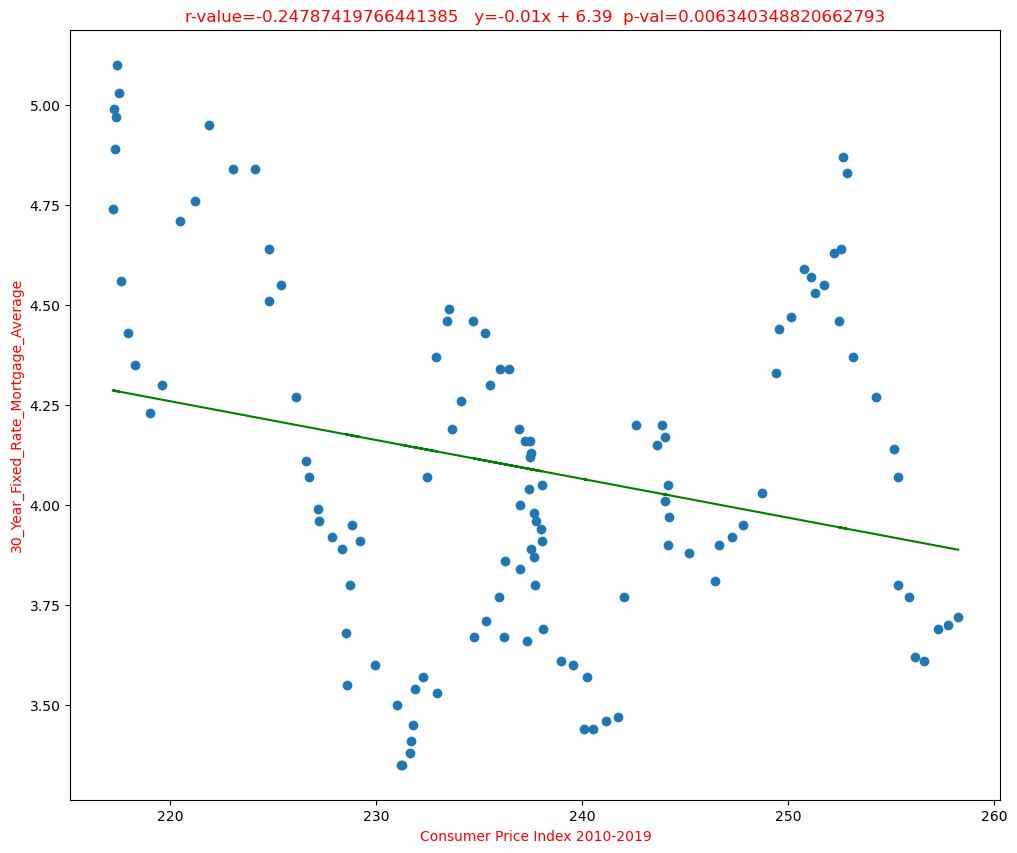

In [809]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged_2010_2019['inflation_percentage'], df_merged_2010_2019['30_Year_Fixed_Rate_Mortgage_Average'], 'Consumer Price Index 2010-2019', '30_Year_Fixed_Rate_Mortgage_Average')
correlation = round(np.corrcoef(df_merged_2010_2019['inflation_percentage'],  df_merged_2010_2019['30_Year_Fixed_Rate_Mortgage_Average'])[1][0], 3)
correlation

0.921

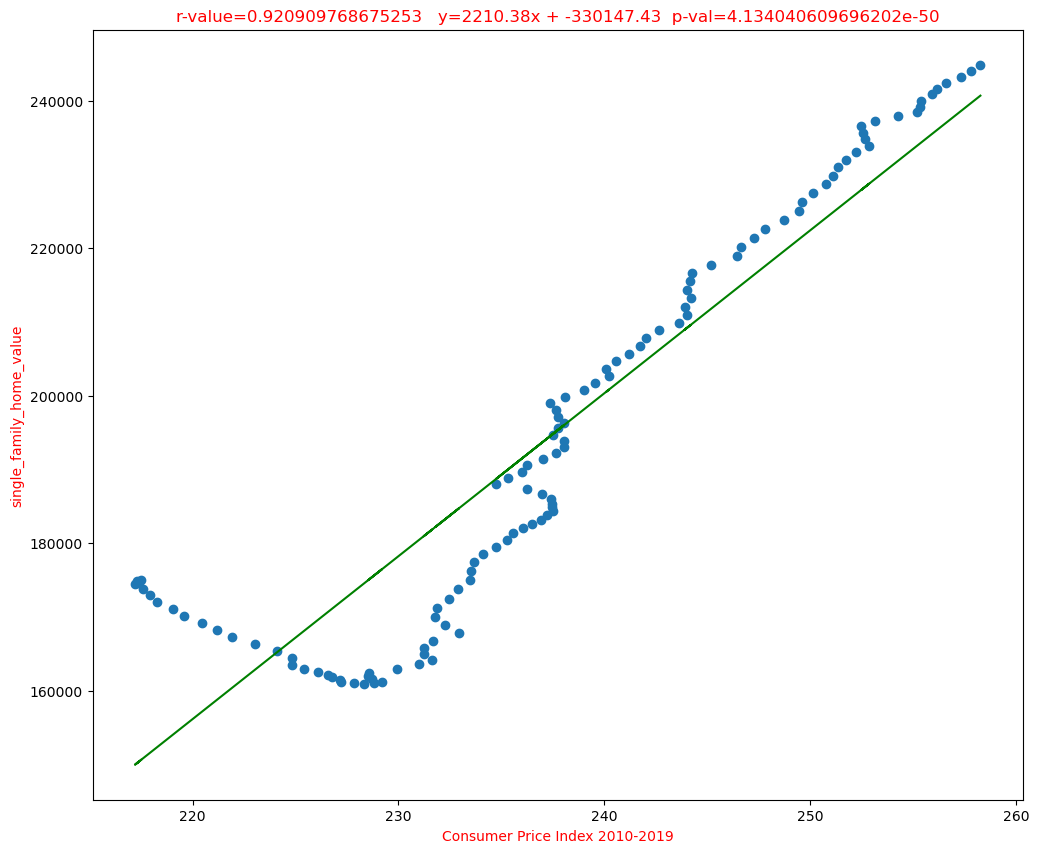

In [810]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged_2010_2019['inflation_percentage'], df_merged_2010_2019['single_family_home_value'], 'Consumer Price Index 2010-2019', 'single_family_home_value')
corr_sfhv_inflation = round(np.corrcoef(df_merged_2010_2019['inflation_percentage'],  df_merged_2010_2019['single_family_home_value'])[1][0], 3)
corr_sfhv_inflation

-0.957

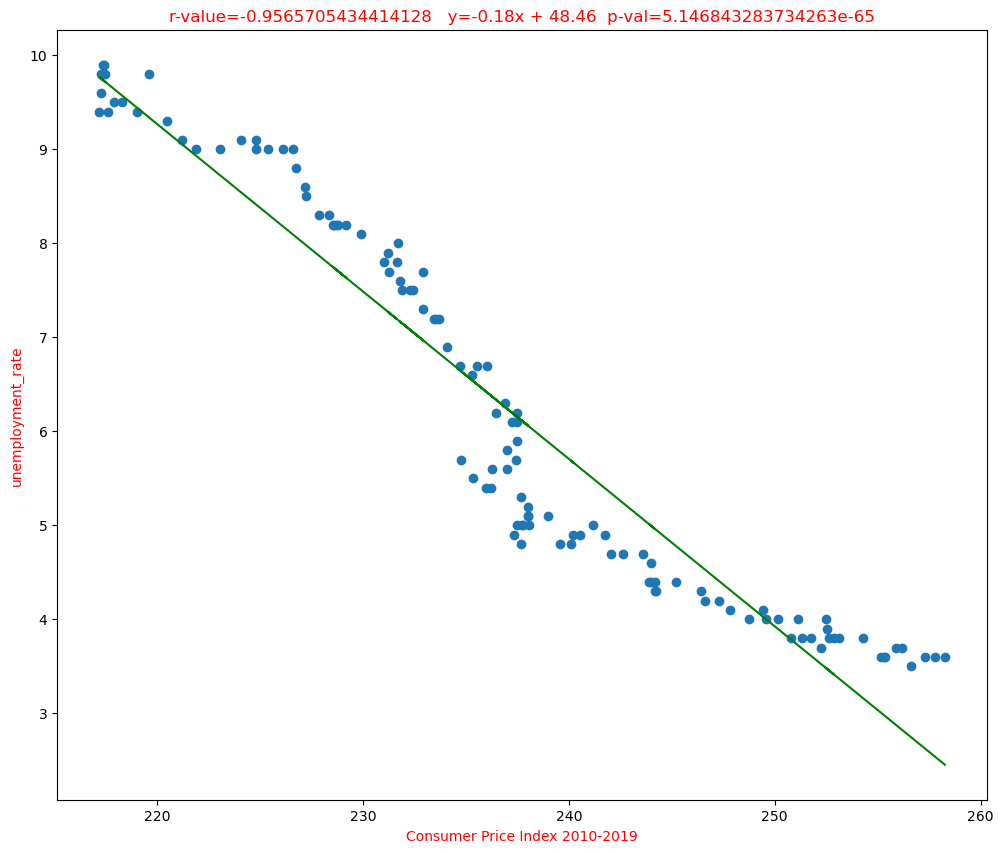

In [811]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged_2010_2019['inflation_percentage'], df_merged_2010_2019['unemployment_rate'], 'Consumer Price Index 2010-2019', 'unemployment_rate')
corr_inflation_unemployment = round([st.pearsonr(df_merged_2010_2019['inflation_percentage'],df_merged_2010_2019['unemployment_rate'])][0].statistic,3)
corr_inflation_unemployment 

0.981

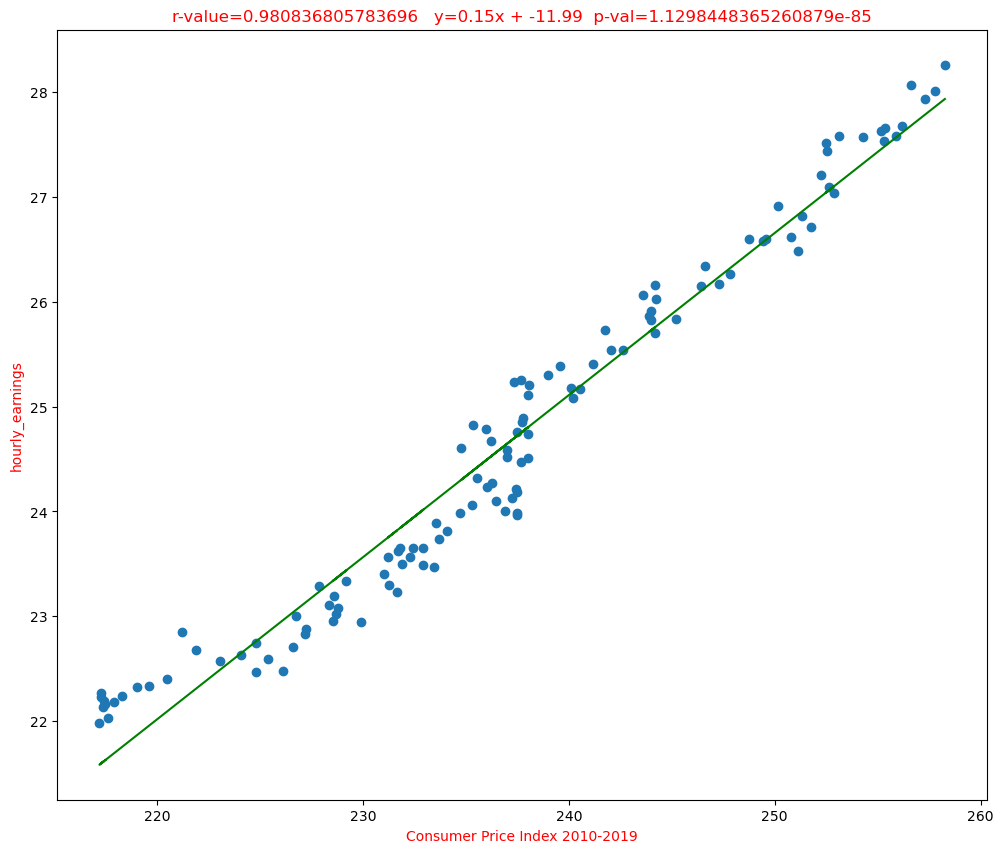

In [812]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
# linearRegressionPlot(df_merged['inflation_percentage'], df_merged['hourly_hourly_earnings'], 'inflation_percentage', 'hourly_hourly_earnings')
linearRegressionPlot(df_merged_2010_2019['inflation_percentage'],  df_merged_2010_2019['hourly_earnings'], 'Consumer Price Index 2010-2019', 'hourly_earnings')
corr_inf_hourlyearning = round(st.linregress(df_merged_2010_2019['inflation_percentage'],df_merged_2010_2019['hourly_earnings']).rvalue, 3)
corr_inf_hourlyearning 

0.921

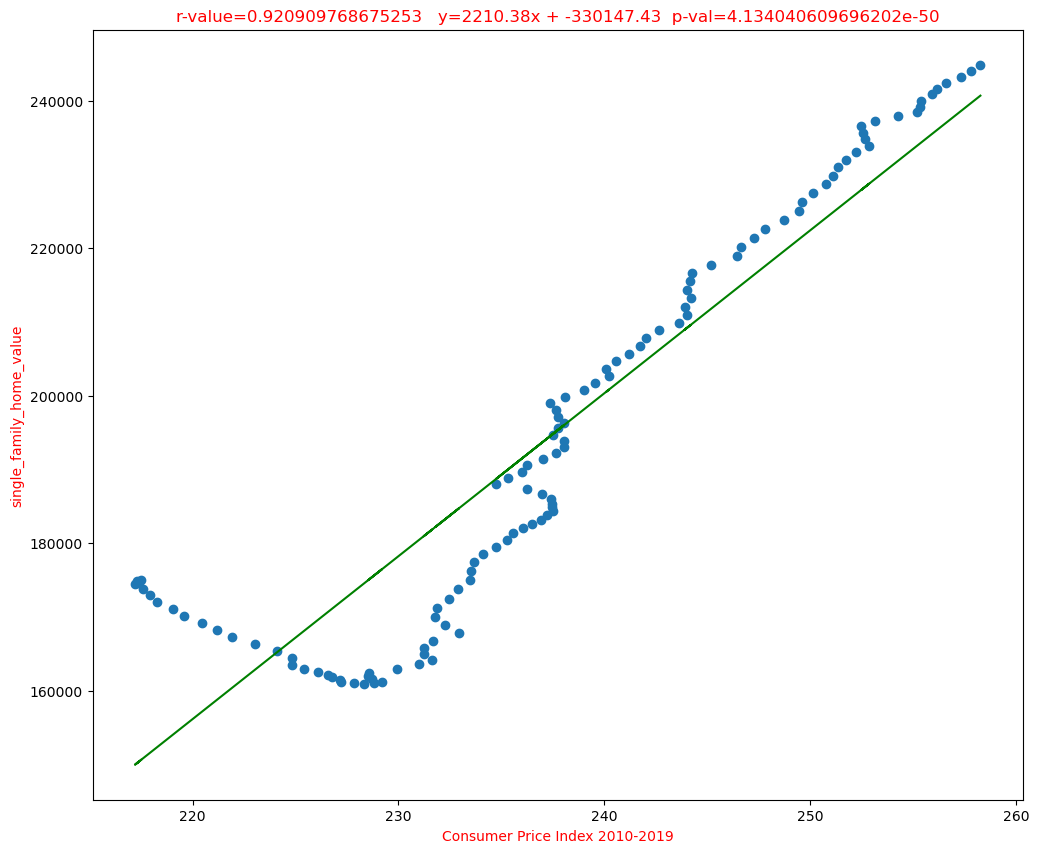

In [813]:
# Date	30Year_Fixed_Rate_Mortgage_Average	inflation_percentage	single_family_home_value	unemployment_rate	hourly_hourly_earnings
linearRegressionPlot(df_merged_2010_2019['inflation_percentage'], df_merged_2010_2019['single_family_home_value'], 'Consumer Price Index 2010-2019', 'single_family_home_value')
corr_sfhv_unemployment = round(st.linregress(df_merged_2010_2019['inflation_percentage'],df_merged_2010_2019['single_family_home_value']).rvalue, 3)
corr_sfhv_unemployment